In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [42]:
df = pd.read_csv("/Users/ryankeen/Personal_Projects/NBA_Betting/data/cleaned/cleaned_data.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
pd.set_option('display.max_rows', None)

In [44]:
df.head()

,game_id,game_date,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,Team_ft_rate,...,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,PG%,SG%,SF%,PF%,C%,player_game_num
0,202012230ORL,2020-12-23,A,MIA,107,104.9,0.548,0.194,0.189,0.193,...,0.860806,0.849817,0.860806,0.146520,0.0,0.0,0.0,42.0,58.0,False
1,202012230ORL,2020-12-23,A,MIA,107,104.9,0.548,0.194,0.189,0.193,...,0.860806,0.849817,0.860806,0.146520,0.0,0.0,0.0,91.0,9.0,1
2,202012250MIA,2020-12-25,H,MIA,111,96.8,0.613,0.166,0.118,0.253,...,0.988870,1.006849,1.014555,0.308219,0.0,0.0,0.0,42.0,58.0,2
3,202012250MIA,2020-12-25,H,MIA,111,96.8,0.613,0.166,0.118,0.253,...,0.988870,1.006849,1.014555,0.308219,0.0,0.0,0.0,91.0,9.0,3
4,202012290MIA,2020-12-29,H,MIA,97,103.4,0.538,0.195,0.079,0.152,...,0.907372,0.896030,0.907372,0.170132,0.0,0.0,0.0,42.0,58.0,4


In [45]:
df.columns

Index(['game_id', 'game_date', 'H_A', 'Team_Abbrev', 'Team_Score', 'Team_pace',
       'Team_efg_rate', 'Team_tov_rate', 'Team_orb_rate', 'Team_ft_rate',
       'Team_off_rtg', 'Opponent_Abbrev', 'Opponent_Score', 'Opponent_pace',
       'Opponent_efg_rate', 'Opponent_tov_rate', 'Opponent_orb_rate',
       'Opponent_ft_rate', 'Opponent_off_rtg', 'player', 'player_id',
       'starter', 'fg', 'fga', 'fg_rate', 'fg3', 'fg3a', 'fg3_rate', 'ft',
       'fta', 'ft_rate', 'pts', 'plus_minus', 'did_not_play', 'is_inactive',
       'ts_rate', 'efg_rate', 'fg3a_per_fga_pct', 'fta_per_fga_pct',
       'orb_rate', 'drb_rate', 'trb_rate', 'ast_rate', 'stl_rate', 'blk_rate',
       'tov_rate', 'usg_rate', 'off_rtg', 'def_rtg', 'bpm', 'season',
       'minutes', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'PG%', 'SG%', 'SF%', 'PF%', 'C%', 'player_game_num'],
      dtype='object')

In [46]:
#Find which columns have null values
nulls = []
for column in df.columns: 
    if df[column].isnull().any() == True:
        nulls.append(column)
nulls

['DKP_per_minute',
 'FDP_per_minute',
 'SDP_per_minute',
 'pf_per_minute',
 'PG%',
 'SG%',
 'SF%',
 'PF%',
 'C%']

In [47]:
df[(df['pf_per_minute'].isnull() == True) & (df['minutes'] != 0)]

#values are null if a player did not play
#will leave null values for minute prediction, but will remove for point prediction

,game_id,game_date,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,Team_ft_rate,...,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,PG%,SG%,SF%,PF%,C%,player_game_num


In [48]:
len(df.Team_Abbrev.unique())

30

In [49]:
game_dates = df.game_date.unique()
sorted(game_dates, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))

['2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30',
 '2019-10-31',
 '2019-11-01',
 '2019-11-02',
 '2019-11-03',
 '2019-11-04',
 '2019-11-05',
 '2019-11-06',
 '2019-11-07',
 '2019-11-08',
 '2019-11-09',
 '2019-11-10',
 '2019-11-11',
 '2019-11-12',
 '2019-11-13',
 '2019-11-14',
 '2019-11-15',
 '2019-11-16',
 '2019-11-17',
 '2019-11-18',
 '2019-11-19',
 '2019-11-20',
 '2019-11-21',
 '2019-11-22',
 '2019-11-23',
 '2019-11-24',
 '2019-11-25',
 '2019-11-26',
 '2019-11-27',
 '2019-11-29',
 '2019-11-30',
 '2019-12-01',
 '2019-12-02',
 '2019-12-03',
 '2019-12-04',
 '2019-12-05',
 '2019-12-06',
 '2019-12-07',
 '2019-12-08',
 '2019-12-09',
 '2019-12-10',
 '2019-12-11',
 '2019-12-12',
 '2019-12-13',
 '2019-12-14',
 '2019-12-15',
 '2019-12-16',
 '2019-12-17',
 '2019-12-18',
 '2019-12-19',
 '2019-12-20',
 '2019-12-21',
 '2019-12-22',
 '2019-12-23',
 '2019-12-25',
 '2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-

In [50]:
#create game_id_player_id for unique game/player combination column
df['game_id_player_id'] = df['game_id'].astype('str') + df['player_id'].astype('str')

In [51]:
print(len(df['game_id_player_id']))
print(len(df['game_id_player_id'].unique()))

59276
40676


In [52]:
df.describe()

,Team_Score,Team_pace,Team_efg_rate,Team_tov_rate,Team_orb_rate,Team_ft_rate,Team_off_rtg,Opponent_Score,Opponent_pace,Opponent_efg_rate,...,minutes,DKP_per_minute,FDP_per_minute,SDP_per_minute,pf_per_minute,PG%,SG%,SF%,PF%,C%
count,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,59276.000000,...,59276.000000,49903.000000,49903.000000,49903.000000,49903.000000,59238.000000,59238.000000,59238.000000,59238.000000,59238.000000
mean,111.615966,99.246214,0.536428,0.121922,0.220961,0.203921,112.524131,110.564073,99.246214,0.530785,...,19.233395,0.902643,0.887747,0.925659,0.093436,18.718627,18.938620,19.694588,20.149026,22.464263
std,12.277861,4.979384,0.066421,0.034473,0.069595,0.076819,11.604968,12.200511,4.979384,0.065995,...,12.566590,0.453081,0.465350,0.483892,0.193594,33.692770,27.340647,27.722753,30.851817,38.165188
min,73.000000,85.500000,0.301000,0.010000,0.000000,0.030000,76.900000,73.000000,85.500000,0.301000,...,0.000000,-0.882353,-1.764706,-1.764706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,95.800000,0.489000,0.097000,0.171000,0.147000,104.800000,102.000000,95.800000,0.484000,...,7.900000,0.620032,0.601552,0.628241,0.033642,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,99.100000,0.535000,0.122000,0.220000,0.198000,112.600000,110.000000,99.100000,0.528000,...,21.016667,0.881410,0.869159,0.905045,0.076956,0.000000,0.000000,2.000000,1.000000,0.000000
75%,120.000000,102.600000,0.581000,0.144000,0.268000,0.253000,120.300000,119.000000,102.600000,0.574000,...,29.733333,1.160037,1.149875,1.198352,0.125654,19.000000,37.000000,35.000000,33.000000,27.000000
max,159.000000,116.100000,0.762000,0.278000,0.463000,0.573000,154.000000,159.000000,116.100000,0.762000,...,47.200000,16.153846,20.769231,20.769231,20.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:>

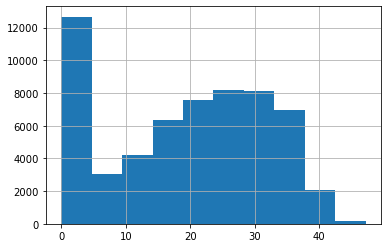

In [53]:
df.minutes.hist()

<AxesSubplot:>

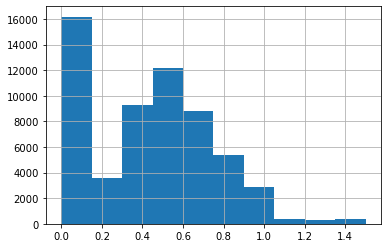

In [54]:
df.efg_rate.hist()

<AxesSubplot:>

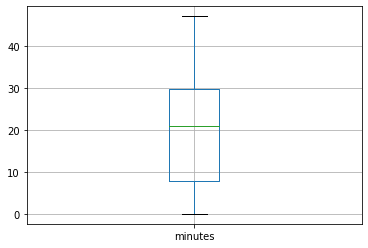

In [55]:
df.boxplot(column = ['minutes'])

<AxesSubplot:>

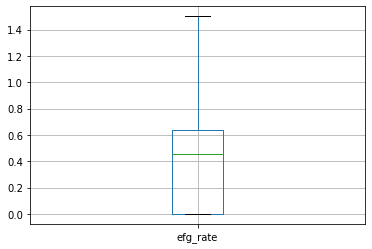

In [56]:
df.boxplot(column = 'efg_rate')

In [57]:
df[['minutes', 'efg_rate', 'fg_rate', 'ft_rate', 'orb_rate', 'off_rtg', 'fg3_rate']].corr()

,minutes,efg_rate,fg_rate,ft_rate,orb_rate,off_rtg,fg3_rate
minutes,1.000000,0.533350,0.534365,0.537818,0.121116,0.576048,0.407456
efg_rate,0.533350,1.000000,0.938264,0.300688,0.164693,0.842126,0.626263
fg_rate,0.534365,0.938264,1.000000,0.320471,0.214267,0.802643,0.502563
ft_rate,0.537818,0.300688,0.320471,1.000000,0.104126,0.423977,0.202168
orb_rate,0.121116,0.164693,0.214267,0.104126,1.000000,0.279686,-0.044596
off_rtg,0.576048,0.842126,0.802643,0.423977,0.279686,1.000000,0.524367
fg3_rate,0.407456,0.626263,0.502563,0.202168,-0.044596,0.524367,1.000000


In [58]:
pd.pivot_table(df, index = 'starter', values = 'minutes')

,minutes
starter,
0,12.005487
1,29.952936


In [59]:
pd.pivot_table(df, index = 'starter', values = ['efg_rate', 'fg_rate', 'ft_rate', 'orb_rate', 'off_rtg', 'fg3_rate'])

,efg_rate,fg3_rate,fg_rate,ft_rate,off_rtg,orb_rate
starter,,,,,,
0,0.342473,0.171742,0.293917,0.232063,74.861795,0.034026
1,0.535047,0.301655,0.465614,0.557944,112.377136,0.045115


In [60]:
df.to_csv("/Users/ryankeen/Personal_Projects/NBA_Betting/data/cleaned/ready_data.csv")